<a href="https://colab.research.google.com/github/Siddhant-Tonne/whatsapp-chat-analysis/blob/master/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('Whatsapp_Chat_Table.csv')
df['message'] = df['message'].apply(lambda x: str(x))

#Creating a function to get the subjectivity
def getSubjectivity(t):
  return TextBlob(t).sentiment.subjectivity

#Creating a function to get the polarity
def getPolarity(t):
  return TextBlob(t).sentiment.polarity

#Creating new coloumns
df['Subjectivity'] = df['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)



In [67]:
df.sample(100)

,Unnamed: 0,date_time,user,message,Subjectivity,Polarity,Analysis
6147,6147,2020-05-11 20:39:00,"Farhan Irani (TSEC IT, SE)",will add a timer thanks,0.20,0.2,Positive
3282,3282,2020-03-16 17:10:00,"Pratik K (TSEC CS, SE)",Baki ke questions,0.00,0.0,Neutral
8293,8293,2020-07-01 17:15:00,+91 73043 57388,Actually i am getting Only 5 numbers after . ...,0.55,0.0,Neutral
5888,5888,2020-05-08 13:56:00,"Pratik K (TSEC CS, SE)",Abhi tak I didn't get attendance for organizin...,0.00,0.0,Neutral
13503,13503,2020-09-30 23:28:00,"Tanay Kamath (TSEC, CS)",Yes,0.00,0.0,Neutral
...,...,...,...,...,...,...,...
2057,2057,2020-02-24 22:10:00,"Darshan Rander (TSEC, IT)",Mene sab pe time waste kiya😅,0.00,-0.2,Negetive
1535,1535,2020-02-21 21:18:00,"Tanay Kamath (TSEC, CS)",With each one of these,0.00,0.0,Neutral
2435,2435,2020-02-28 21:29:00,+91 90820 98830,nan,0.00,0.0,Neutral
6351,6351,2020-05-16 22:35:00,+91 93598 18687,<Media omitted>,0.00,0.0,Neutral


In [ ]:
#Check positive,negetive or neutral chats
def getAnalysis(score):
  if(score < 0):
    return 'Negetive'
  elif(score == 0):
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.sample(100)

,Unnamed: 0,date_time,user,message,Subjectivity,Polarity,Analysis
4241,4241,2020-03-30 20:18:00,"Pratik K (TSEC CS, SE)",c++ me,0.0,0.0,Neutral
2762,2762,2020-03-07 19:10:00,"Darshan Rander (TSEC, IT)",😢😢,0.0,0.0,Neutral
6694,6694,2020-05-28 02:38:00,"Kartik Soneji (TSEC, CS)",Which seems like a MASSIVE waste.,0.5,-0.1,Negetive
12133,12133,2020-09-13 17:45:00,"Darshan Rander (TSEC, IT)",Ohh mene usko 2 he loya,0.0,0.0,Neutral
10491,10491,2020-08-24 21:49:00,+91 94044 50783,This message was deleted,0.0,0.0,Neutral
...,...,...,...,...,...,...,...
6949,6949,2020-06-04 23:09:00,+91 84335 18102,Alrighty! Thanks,0.2,0.2,Positive
7617,7617,2020-06-14 17:13:00,"Harsh Kapadia (TSEC IT, SE)",Yeah,0.0,0.0,Neutral
664,664,2020-02-09 07:16:00,"Vivek Iyer (TSEC, Biomed)",In this case what should be written in printf ...,0.0,0.0,Neutral
8362,8362,2020-07-01 17:48:00,"Kartik Soneji (TSEC, CS)","Yes, but almost all languages have an implemen...",0.0,0.0,Neutral


In [71]:
#Print all positive chats
sortedDF = df.sort_values(by = ['Polarity'])
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(f'{j}) ',sortedDF['message'][i])
    j+=1
    if(j > 100):
      break

1)  Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more. 
2)  Sure 
3)  More of logic or algo problems^ 
4)  Nice idea 🤟 
5)  Also  Please note  People genuinely interested in coding or Want to start coding only be in this group 
6)  Are you really thinking of just  printing the pattern😂 
7)  Cool 
8)  Alright  Actually, I was being lazy  Thoda syntax strong nahi hai😅😂 
9)  Thanks bhai 
10)  int main() {   int n;   cin>>n;   for (int i=1;i<=n;i++){       for(int j=1;j<=n+1-i;j++){           cout<<"*";       }       for (int k=1;k<=2*i-2;k++){           cout<<" ";       }       for(int j=1;j<=n+1-i;j++){           cout<<"*";       }cout<<endl;   }   for(int i=1;i<=n;i++){       for(int j=1;j<=i;j++){           cout<<"*";       }       for(int k=1;k<=2*(n-i);k++){           cout<<" ";           }           for (int j=1;j<=i;j++){               cout<<"*";           }cout<<endl;   } 
11)  Great !! Good u

In [72]:
#Print all Negetive chats
sortedDF = df.sort_values(by = ['Polarity'],ascending = 'False')
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negetive'):
    print(f'{j}) ',sortedDF['message'][i])
    j+=1
    if(j > 100):
      break

1)  Everyday a new challenge 
2)  Something or the other  So that we can build our problem solving skills 
3)  Dheeraj Lalwani (TSEC, CS) changed the subject from "CODERS👨‍💻👩‍💻🖥💻" to "TSEC CODERS👨‍💻👩‍💻🖥💻" 
4)  What would be the solution if the language is C ??  I mean we are learning so let's try going for it 
5)  I got a bit confused... 
6)  Created Another soln bcoz my previous wasn giving problems(not printing spaces) 
7)  This'll also do for that hollow diamond prog in c 
8)  Bcoz its a wrong program 
9)  Comma operator a small and imp note 
10)  Haan sorry 
11)  I will dry run it later 
12)  infact mere hisaab se undeclared indentifier ka error bhi pop up hona chaiye tha but run horaha hai🤯🤯 
13)  If you put the double in a variable and then store it in other variable after typescasting then it works! Like, x=pow(...); y=(int)x; 
14)  darshan sir told us to avoid statements like break if possible since it causes halt in the flow of the program abruptly and causes voltage fluctuati

In [ ]:
df2 = df.sample(500)

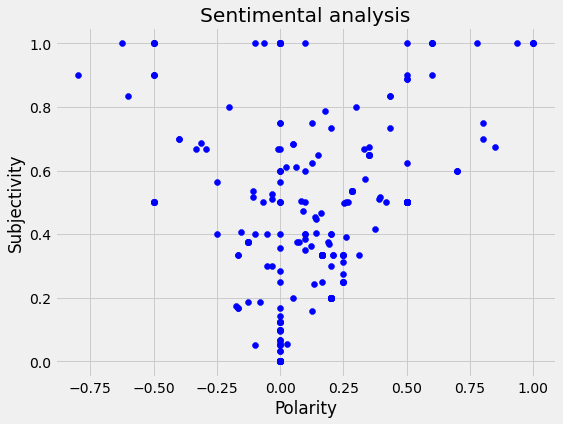

In [ ]:
df2 = df.head(1000)
import matplotlib.pyplot as plt
plt.figure(figsize =  (8,6))
for i in range(0,df2.shape[0]):
  plt.scatter(df2['Polarity'][i],df2['Subjectivity'][i],color = "Blue")

plt.title('Sentimental analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Counting the sum of polarities
sum = 0
for i in range(0,df.shape[0]):
    sum += df['Polarity'][i]

  

In [70]:
if(sum > 0):
  print("The ovrall Sentiment in chat is Positive")
elif(sum < 0):
  print("The overall Sentiment in chat is negetive")

The ovrall Sentiment in chat is Positive


In [ ]:
#Count to get number of Negetive messages
NegetiveCount = 0
for i in range(0,df.shape[0]):
  val = df['Polarity'][i]
  if(val < 0):
    NegetiveCount += 1

NegetiveCount

808

In [ ]:
#Count to get number of Positive messages
PositiveCount = 0
for i in range(0,df.shape[0]):
  val = df['Polarity'][i]
  if(val > 0):
    PositiveCount += 1

PositiveCount

2465